### Auto MPG 데이터셋을 사용하여 1970년대 후반과 1980년대 초반의 자동차 연비를 예측하는 모델을 만듭니다. 이 정보에는 실린더 수, 배기량, 마력(horsepower), 공차 중량 같은 속성이 포함됩니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# 구글 드라이브 마운트


In [2]:
# Working Directory 설정
import os

In [3]:
os.chdir('/content/drive/MyDrive/kdigital2/deeplearning/data')

파일은 auto-mpg.csv 입니다.

In [4]:
df = pd.read_csv('auto-mpg.csv')

In [5]:
df

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [6]:
# 1  빈데이터 확인
df.isna().sum()


mpg       0
cyl       0
displ     0
hp        0
weight    0
accel     0
yr        0
origin    0
name      0
dtype: int64

In [ ]:
# 2 빈 데이터 삭제


In [ ]:
# 3. X , y 셋팅

In [8]:
X = df.iloc[ : , 1 : -2+1  ]

In [9]:
y = df['mpg']

In [10]:
X.head()

,cyl,displ,hp,weight,accel,yr,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [ ]:
# 4. 카테고리컬 데이터 처리 
# Origin 컬럼은 다음과 같다. (1. American, 2. European,3. Japanese).

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cyl     392 non-null    int64  
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   yr      392 non-null    int64  
 6   origin  392 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 21.6 KB


In [12]:
X['origin'].nunique()

3

In [13]:
X['origin'].unique()

array([1, 3, 2])

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
from sklearn.compose import ColumnTransformer

In [16]:
ct = ColumnTransformer( [ ('encoder', OneHotEncoder(), [6]) ] ,
                       remainder= 'passthrough')

In [18]:
X = ct.fit_transform(X)

In [21]:
X = X[ : , 1 :  ]

In [22]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [ ]:
# 5. X 만 피처 스케일링 하시오 (차트 확인을 위해, y는 하지 않습니다.)

In [23]:
X

array([[   0. ,    0. ,    8. , ..., 3504. ,   12. ,   70. ],
       [   0. ,    0. ,    8. , ..., 3693. ,   11.5,   70. ],
       [   0. ,    0. ,    8. , ..., 3436. ,   11. ,   70. ],
       ...,
       [   0. ,    0. ,    4. , ..., 2295. ,   11.6,   82. ],
       [   0. ,    0. ,    4. , ..., 2625. ,   18.6,   82. ],
       [   0. ,    0. ,    4. , ..., 2720. ,   19.4,   82. ]])

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
sc_X = MinMaxScaler()

In [27]:
X_scaled = sc_X.fit_transform(X)

In [ ]:
# 5. 트레인 / 테스트용 셋으로 분리

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 7)

In [ ]:
# 딥러닝 모델링

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
# ANN 모델링

In [32]:
X_train.shape

(313, 8)

In [35]:
def build_model() :
  model = Sequential()
  model.add( Dense(64, 'relu', input_shape= (8, ) ) )
  model.add( Dense(64, 'relu'))
  model.add( Dense(1, 'linear'))
  # 옵티마이저의 learning rate 을 설정하는 방법 
  model.compile(tf.keras.optimizers.RMSprop(learning_rate= 0.001), loss='mse', metrics=['mse', 'mae'])
  return model

In [45]:
model = build_model()

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [47]:
X_train.shape

(313, 8)

In [48]:
epoch_history = model.fit(X_train, y_train, epochs = 1000, validation_split= 0.2)

Epoch 1/1000
8/8 [==============================] - 1s 25ms/step - loss: 598.5978 - mse: 598.5978 - mae: 23.1630 - val_loss: 538.7917 - val_mse: 538.7917 - val_mae: 21.7469
Epoch 2/1000
8/8 [==============================] - 0s 6ms/step - loss: 566.2003 - mse: 566.2003 - mae: 22.4662 - val_loss: 506.4239 - val_mse: 506.4239 - val_mae: 21.0001
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 529.9188 - mse: 529.9188 - mae: 21.6381 - val_loss: 467.3281 - val_mse: 467.3281 - val_mae: 20.0484
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 486.7387 - mse: 486.7387 - mae: 20.5952 - val_loss: 421.8181 - val_mse: 421.8181 - val_mae: 18.8688
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 436.2948 - mse: 436.2948 - mae: 19.3188 - val_loss: 368.5685 - val_mse: 368.5685 - val_mae: 17.3810
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 378.5686 - mse: 378.5686 - mae: 17.7282 - val_loss: 310.6983 - val_

In [49]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 8.0330 - mse: 8.0330 - mae: 2.0999


[8.033020973205566, 8.033020973205566, 2.0999021530151367]

In [50]:
########## validation ############

In [51]:
## epoch_history 객체에 저장된 통계치를 사용해 모델의 훈련 과정을 시각화!

In [52]:
import matplotlib.pyplot as plt
def plot_history(history) :
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize = (8, 12))

  plt.subplot(2, 1, 1)
  plt.xlabel('Eopoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'], label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2, 1, 2)
  plt.xlabel('Eopoch')
  plt.ylabel('Mean Squared Error [MPG]')
  plt.plot(hist['epoch'], hist['mse'], label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()

  plt.show()

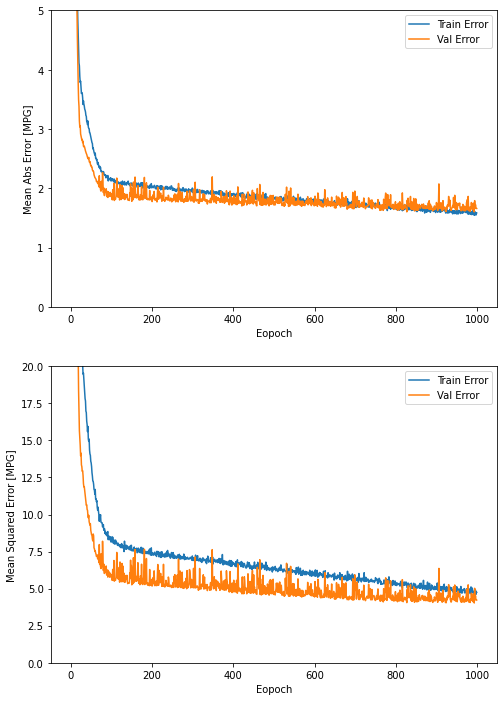

In [53]:
plot_history(epoch_history)

In [57]:
epoch_history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

In [59]:
epoch_history.history['mse']

[598.5978393554688,
 566.2003173828125,
 529.9188232421875,
 486.7386779785156,
 436.2947692871094,
 378.5685729980469,
 317.0865478515625,
 255.46856689453125,
 199.0346221923828,
 151.70782470703125,
 115.74044799804688,
 92.15615844726562,
 75.86514282226562,
 63.81070327758789,
 54.13461685180664,
 46.400760650634766,
 39.92988204956055,
 34.433162689208984,
 31.6384220123291,
 28.72272491455078,
 26.535274505615234,
 25.56808853149414,
 24.266408920288086,
 23.351469039916992,
 23.10395622253418,
 22.02958869934082,
 21.81047248840332,
 21.26186180114746,
 21.19420623779297,
 20.09941864013672,
 19.469009399414062,
 19.541555404663086,
 19.087602615356445,
 18.604326248168945,
 18.08711051940918,
 17.823158264160156,
 17.66191291809082,
 16.977052688598633,
 16.883224487304688,
 16.299009323120117,
 16.077678680419922,
 15.595361709594727,
 15.94450569152832,
 15.094793319702148,
 14.934489250183105,
 15.091466903686523,
 14.348794937133789,
 14.081974029541016,
 13.99643039703369

이 그래프를 보면 수 백번 에포크를 진행한 이후에는 모델이 거의 향상되지 않는 것 같습니다. model.fit 메서드를 수정하여 검증 점수가 향상되지 않으면 자동으로 훈련을 멈추도록 만들어 보죠. 에포크마다 훈련 상태를 점검하기 위해 EarlyStopping 콜백(callback)을 사용하겠습니다. 지정된 에포크 횟수 동안 성능 향상이 없으면 자동으로 훈련이 멈춥니다.

이 콜백에 대해 더 자세한 내용은 여기를 참고하세요.[링크 텍스트](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

In [60]:
model = build_model()

In [61]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [62]:
epoch_history = model.fit(X_train, y_train, epochs=1000000, validation_split=0.2,
                          callbacks = [early_stop] )
# 콜백이란?? 프레임워크가 실행하는 코드. 코드 실행을 프레임워크에 맡기는것. 

Epoch 1/1000000
8/8 [==============================] - 1s 28ms/step - loss: 594.6169 - mse: 594.6169 - mae: 23.0864 - val_loss: 535.3773 - val_mse: 535.3773 - val_mae: 21.6646
Epoch 2/1000000
8/8 [==============================] - 0s 6ms/step - loss: 564.1548 - mse: 564.1548 - mae: 22.4007 - val_loss: 504.1085 - val_mse: 504.1085 - val_mae: 20.9055
Epoch 3/1000000
8/8 [==============================] - 0s 6ms/step - loss: 530.9396 - mse: 530.9396 - mae: 21.6025 - val_loss: 468.4082 - val_mse: 468.4082 - val_mae: 19.9964
Epoch 4/1000000
8/8 [==============================] - 0s 6ms/step - loss: 491.8905 - mse: 491.8905 - mae: 20.6492 - val_loss: 426.4125 - val_mse: 426.4125 - val_mae: 18.8716
Epoch 5/1000000
8/8 [==============================] - 0s 6ms/step - loss: 446.5439 - mse: 446.5439 - mae: 19.4657 - val_loss: 379.0930 - val_mse: 379.0930 - val_mae: 17.5152
Epoch 6/1000000
8/8 [==============================] - 0s 6ms/step - loss: 396.2606 - mse: 396.2606 - mae: 18.0703 - val_los

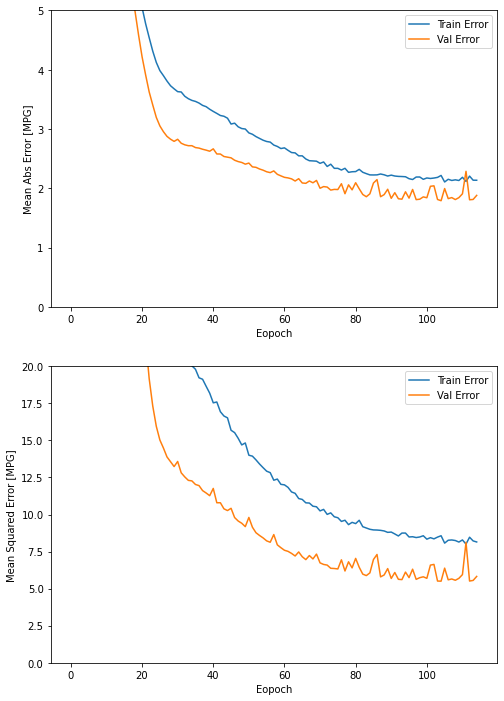

In [63]:
plot_history(epoch_history)